In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## RECCURENT NEURAL NETWORK


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Import MNIST dataset



In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.T

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 1) Define you hyperparameters: 


In [ ]:
# hyperparameters
n_neurons = 128
learning_rate = 0.001
batch_size = 128  
n_epochs = 10

In [ ]:
# parameters
n_steps = 28 
n_inputs = 28 
n_outputs = 10 

### 2) Explore data


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
Y_train_all = np.eye(10)[Y_train]
print(Y_train_all.shape)

y_test = np.eye(10)[Y_test]
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(60000, 10)
(10000, 10)


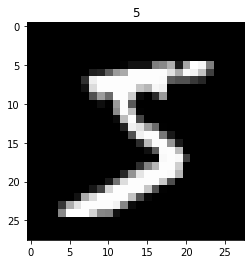

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title('%i' % np.argmax(Y_train_all[0]))
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape = (28,28), activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))



In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = 'sparse_categorical_crossentropy',  optimizer = 'adam',      metrics = ['mae'])
model.fit(X_train,Y_train, epochs = 20, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 94s 2ms/step - loss: 23.6692 - mae: 4.3737 - val_loss: 2.3012 - val_mae: 4.3630
Epoch 2/20
60000/60000 [==============================] - 92s 2ms/step - loss: 2.3469 - mae: 4.3737 - val_loss: 2.3011 - val_mae: 4.3630
Epoch 3/20
60000/60000 [==============================] - 91s 2ms/step - loss: 2.3335 - mae: 4.3737 - val_loss: 2.3117 - val_mae: 4.3630
Epoch 4/20
60000/60000 [==============================] - 91s 2ms/step - loss: 2.7309 - mae: 4.3737 - val_loss: 2.3012 - val_mae: 4.3630
Epoch 5/20
60000/60000 [==============================] - 92s 2ms/step - loss: 2.3997 - mae: 4.3737 - val_loss: 2.3011 - val_mae: 4.3630
Epoch 6/20
60000/60000 [==============================] - 90s 2ms/step - loss: 2.3364 - mae: 4.3737 - val_loss: 2.3011 - val_mae: 4.3630
Epoch 7/20
60000/60000 [==============================] - 90s 2ms/step - loss: 2.3364 - mae: 4.3737 - val_loss: 2.3011 - val_ma

In [ ]:
model.evaluate(X_test, Y_test)